In [2]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
import MathOptInterface as MOI
import Ipopt 
using LinearAlgebra, Plots
import FiniteDiff
import ForwardDiff as FD
using MeshCat
using Test
using Plots

include(joinpath(@__DIR__, "utils", "fmincon.jl"))

  Activating project at `c:\Users\aphia\Desktop\school\ocrl\QuadraCat`


fmincon (generic function with 1 method)

In [3]:
include(joinpath(@__DIR__, "utils", "quadruped_new.jl"))
model = UnitreeA1()
@show num_positions(model.mech)
@show num_velocities(model.mech)
@show joints(model.mech)
@show bodies(model.mech)

num_positions(model.mech) = 19
num_velocities(model.mech) = 18
joints(model.mech) = Joint{Float64, JT} where JT<:JointType{Float64}[Joint "base_to_world": Quaternion floating joint, Joint "floating_base": Fixed joint, Joint "imu_joint": Fixed joint, Joint "FR_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "FL_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "RR_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "RL_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "FR_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "FL_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RR_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RL_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "FR_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "FL_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RR_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RL_calf_joint": Revolute joi

20-element Vector{RigidBody{Float64}}:
 RigidBody: "world"
 RigidBody: "base"
 RigidBody: "trunk"
 RigidBody: "imu_link"
 RigidBody: "FR_hip"
 RigidBody: "FL_hip"
 RigidBody: "RR_hip"
 RigidBody: "RL_hip"
 RigidBody: "FR_thigh"
 RigidBody: "FL_thigh"
 RigidBody: "RR_thigh"
 RigidBody: "RL_thigh"
 RigidBody: "FR_calf"
 RigidBody: "FL_calf"
 RigidBody: "RR_calf"
 RigidBody: "RL_calf"
 RigidBody: "FR_foot"
 RigidBody: "FL_foot"
 RigidBody: "RR_foot"
 RigidBody: "RL_foot"

In [4]:
xic = initial_state(model)
q = xic[1:num_positions(model.mech)]

@show get_trunk_position(model, q)
@show get_foot_position(model, q, "RR")
@show get_foot_position(model, q, "FL")
@show get_trunk_velocity(model, xic)

get_trunk_position(model, q) = [0.0, 0.0, 0.2571150438746157]
get_foot_position(model, q, "RR") = [-0.183, -0.13205, -2.7755575615628914e-17]
get_foot_position(model, q, "FL") = [0.183, 0.13205, -2.7755575615628914e-17]
get_trunk_velocity(model, xic) = [0.0, 0.0, 0.0]


3-element SVector{3, Float64} with indices SOneTo(3):
 0.0
 0.0
 0.0

In [5]:
# visualize initial state
mvis = initialize_visualizer(model)
xic = initial_state(model)
set_configuration!(mvis, xic[1:num_positions(model.mech)])
render(mvis)

┌ Info: Listening on: 127.0.0.1:8700, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8700
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("trunk" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x2f, 0x74, 0x72, 0x75, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_floating_base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_hip" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x75, 0x6e, 0x6b, 0x2f, 0x52, 0x4c, 0x5f, 0x68, 0x69, 0x70], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x2f, 0x52, 0x4c, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_17" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x68, 0x2f, 0x52, 0x4c, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x66, 0x2f, 0x52, 0x4c, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6f, 0x6f, 0x74, 0x5f, 0x66, 0x69, 0x78, 0x65, 0x64], Dict{String, Vector{UInt8}}(), not

In [6]:
## set up discrete time dynamics

# our continuous time dynamics function is xdot = dynamics(model, x, u)

function hermite_simpson_ground(params::NamedTuple, x1::Vector, x2::Vector, u::Vector, λ::Vector, dt)::Vector
    model = params.model
    #u = u_hat[1:end-4]
    #λ = u_hat[end-3:end]
    
    x12 = 0.5*(x1+x2) + dt/8*(dynamics(model, x1, u, λ) - dynamics(model, x2, u, λ))
    return x1 + dt/6 * (dynamics(model, x1, u, λ) + 4 * dynamics(model, x12, u, λ) + dynamics(model, x2, u, λ)) - x2
end

hermite_simpson_ground (generic function with 1 method)

In [7]:
## set up cost

function quadracat_cost(params::NamedTuple, Z::Vector)::Real
    idx, N = params.idx, params.N
    Q, R, Qf = params.Q, params.R, params.Qf
    Xref,Uref = params.Xref, params.Uref

    J = 0
    for i=1:(N-1)
        xi = Z[idx.x[i]]
        ui = Z[idx.u[i]]
        J += 0.5*(xi - Xref[i])'*Q*(xi - Xref[i]) + 0.5*(ui - Uref[i])'*R*(ui - Uref[i])
    end
    xN = Z[idx.x[N]]
    J += 0.5*(xN - Xref[N])'*Qf*(xN - Xref[N])
        
    return J

end

quadracat_cost (generic function with 1 method)

In [8]:
## set up equality constraints 

function quadracat_dynamics_constraints(params::NamedTuple, Z::Vector)::Vector
    idx, N, dt = params.idx, params.N, params.dt

    c = zeros(eltype(Z), idx.nc)

    for i=1:(N-1)
        xk = Z[idx.x[i]]
        uk = Z[idx.u[i]]
        λk = Z[idx.λ[i]]
        xk1 = Z[idx.x[i+1]]

        c[idx.c[i]] = hermite_simpson_ground(params, xk, xk1, uk, λk, dt)
    end
    return c 
end

function quadracat_stance_constraint(params::NamedTuple, Z::Vector)::Vector
    idx, N, model = params.idx, params.N, params.model
    nq = params.nq
        
    # create c in a ForwardDiff friendly way (check HW0)
    c = zeros(eltype(Z), 0)
    
    # each foot is pinned to the ground
    for i=1:(N-1)
        xk = Z[idx.x[i]]
        v = xk[nq+1:end]
        # c = vcat(c, [
        #                     get_foot_position(model, q, "RR")[3]; 
        #                     get_foot_position(model, q, "RL")[3];
        #                     get_foot_position(model, q, "FL")[3];
        #                     get_foot_position(model, q, "FR")[3]
        #                     ])
        c = vcat(c, [
            jac_foot(model, q, "RR")*v;
            jac_foot(model, q, "RL")*v;
            jac_foot(model, q, "FL")*v;
            jac_foot(model, q, "FR")*v
        ])
    end

    return c

end

function quadracat_equality_constraint(params::NamedTuple, Z::Vector)::Vector
    N, idx, xic = params.N, params.idx, params.xic
    xg = params.xg
    
    # TODO: stack up all of our equality constraints 
    
    # should be length 2*nx + (N-1)*nx + N 
    # inital condition constraint (nx)       (constraint 1)
    # terminal constraint         (nx)       (constraint 2)
    # dynamics constraints        (N-1)*nx   (constraint 3-6)
    # stance constraint           N          (constraint 7-8)
    ic_con = Z[idx.x[1]] - xic
    xg_con = Z[idx.x[N]] - xg
    return [ic_con; 
    #xg_con;
    quadracat_dynamics_constraints(params, Z); 
    quadracat_stance_constraint(params, Z)
    ]
end

quadracat_equality_constraint (generic function with 1 method)

In [9]:
## set up inequality constraint 

function quadracat_inequality_constraint(params::NamedTuple, Z::Vector)::Vector
    idx, N, model = params.idx, params.N, params.model
    xg = params.xg
        
    # create c in a ForwardDiff friendly way (check HW0)
    c = zeros(eltype(Z), 0)
    
    # for i=1:(N-1)
    #     xk = Z[idx.x[i]]
    #     v = xk[nq+1:end]
    #     c = vcat(c, [
    #         (jac_foot(model, q, "RR")*v)[3];
    #         (jac_foot(model, q, "RL")*v)[3];
    #         (jac_foot(model, q, "FL")*v)[3];
    #         (jac_foot(model, q, "FR")*v)[3]
    #     ])
    # end

    c = vcat(c, norm(Z[idx.x[N]] - xg, Inf))

    return c
end

quadracat_inequality_constraint (generic function with 1 method)

In [ ]:
function solve_quadracat_crouch(;verbose=true)
    
    # problem size 
    nq = num_positions(model.mech)
    nv = num_velocities(model.mech)
    nx = nq+nv
    nu = control_dim(model)
    nλ = 12
    
    #Xref, Uref, t_vec = reference_trajectory(model)
    #N = length(t_vec)
    tf = 0.5
    dt = 0.25
    t_vec = 0:dt:tf 
    N = length(t_vec)
    Xref = [initial_state(model) for i=1:N]
    Uref = [0.001*randn(nu) for i=1:(N-1)]
    
    # LQR cost 
    Q = diagm(ones(nx))
    R = 0.1*diagm(ones(nu))
    Qf = 10*deepcopy(Q)
    
    # indexing 
    idx = create_idx(nx,nu,nλ,N)
    
    # initial and goal states 
    xic = Xref[1]
    xg = Xref[end]

    # initial guess 
    z0 = zeros(idx.nz)
    for i=1:(N-1)
        z0[idx.x[i]] = Xref[i]
        z0[idx.u[i]] = Uref[i]
    end
    z0[idx.x[N]] = Xref[N]

    # load all useful things into params 
    params = (
        model=model,
        nx=nx, 
        nu=nu, 
        nq=nq,
        nv=nv,
        dt=dt,
        Q = Q, 
        R = R, 
        Qf = Qf, 
        xic = xic, 
        xg=xg,
        N = N, 
        idx = idx,
        g = 9.81,
        Xref=Xref,
        Uref=Uref
        )
    
    # TODO: primal bounds 
    x_l = -Inf*ones(idx.nz)
    x_u = Inf*ones(idx.nz)
    for i = 1:(N-1)
        x_l[idx.λ[i][3]] = 0.0
        x_l[idx.λ[i][6]] = 0.0
        x_l[idx.λ[i][9]] = 0.0
        x_l[idx.λ[i][12]] = 0.0
    end
    
    # inequality constraint bounds
    c_l = zeros(0)
    c_u = zeros(0)
    function inequality_constraint(params, Z)
        return zeros(eltype(Z), 0)
    end
    # c_l = zeros(4*(N-1))
    # c_u = Inf*ones(4*(N-1))
    # c_l = -Inf*ones(1)
    # c_u = 1e-2*ones(1)

    
    # choose diff type (try :auto, then use :finite if :auto doesn't work)
    diff_type = :auto 
#     diff_type = :finite
    
    
    Z = fmincon(quadracat_cost,quadracat_equality_constraint,inequality_constraint,
                x_l,x_u,c_l,c_u,z0,params, diff_type;
                tol = 1e-3, c_tol = 1e-3, max_iters = 5_00, verbose = verbose)
    
    # pull the X and U solutions out of Z 
    X = [Z[idx.x[i]] for i = 1:N]
    U = [Z[idx.u[i]] for i = 1:(N-1)]
    λ = [Z[idx.λ[i]] for i = 1:(N-1)]
    
    return X, U, λ, t_vec, params 
end

solve_quadracat_crouch (generic function with 1 method)

In [11]:
X, U, λ, t_vec, params_dircol = solve_quadracat_crouch(verbose=true)

---------checking dimensions of everything----------
---------all dimensions good------------------------
---------diff type set to :auto (ForwardDiff.jl)----
---------testing objective gradient-----------------
---------testing constraint Jacobian----------------
---------successfully compiled both derivatives-----
---------IPOPT beginning solve----------------------

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:    21465
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian..

([[1.000000000005875, -2.0317746133769267e-12, -1.3423859469963495e-12, -6.958681872310772e-13, 1.7655426633027231e-12, -1.197917299025415e-11, 0.2571150438721372, -4.513166005410013e-15, 1.1837442569756735e-14, -1.8813708868197718e-14  …  1.2657868717217357e-13, -2.7173555387784703e-14, -9.885681251875598e-14, -6.189506885870924e-14, -4.816867681458803e-14, -5.570728226662857e-14, -2.2431513457174484e-14, -1.4924102179503467e-14, 8.023098707067868e-14, 9.244295759790368e-14], [0.9998163480921377, 0.007364133424412406, -0.017997861589465303, -9.402732114136446e-5, -0.006822757404231675, 0.0017297049905106747, 0.2619566824759753, 0.011132534706565462, -0.024435946594039543, -0.04041929841565247  …  -0.19599424312430225, -0.1959942431298975, -0.13131099049139072, -0.2805881794395958, -0.1528593225922031, -0.19050294673327076, 0.10249640907412533, 0.4010507869717001, 0.14559307327032894, 0.22088032155070986], [0.9979416745676225, 0.00870687846814453, -0.06340200466921908, 0.00547390507906

In [12]:
qs = [xk[1:num_positions(model.mech)] for xk in X] # extract positions from state vector

mvis = initialize_visualizer(model)
xic = initial_state(model)
set_configuration!(mvis, xic[1:num_positions(model.mech)])
anim = MeshCat.Animation(mvis, t_vec, qs)
setanimation!(mvis, anim)
render(mvis)

┌ Info: Listening on: 127.0.0.1:8701, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8701
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("trunk" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x2f, 0x74, 0x72, 0x75, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_floating_base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_hip" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x75, 0x6e, 0x6b, 0x2f, 0x52, 0x4c, 0x5f, 0x68, 0x69, 0x70], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x2f, 0x52, 0x4c, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_17" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x68, 0x2f, 0x52, 0x4c, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x66, 0x2f, 0x52, 0x4c, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0

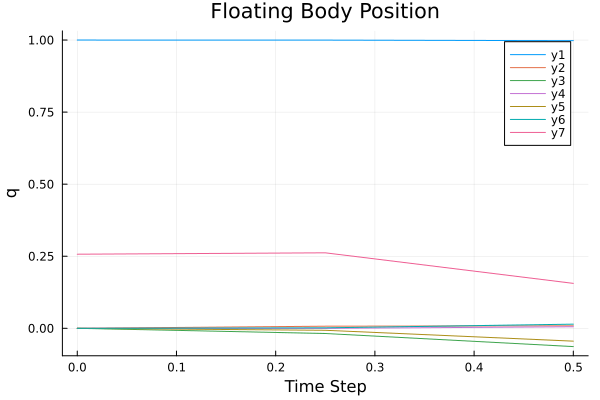

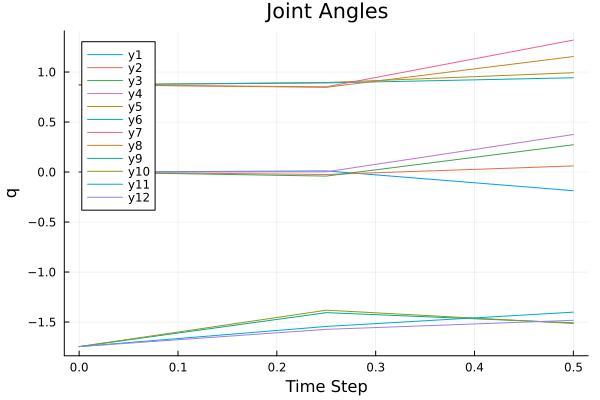

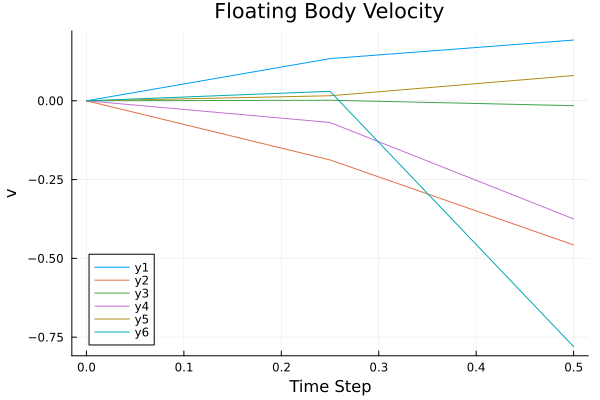

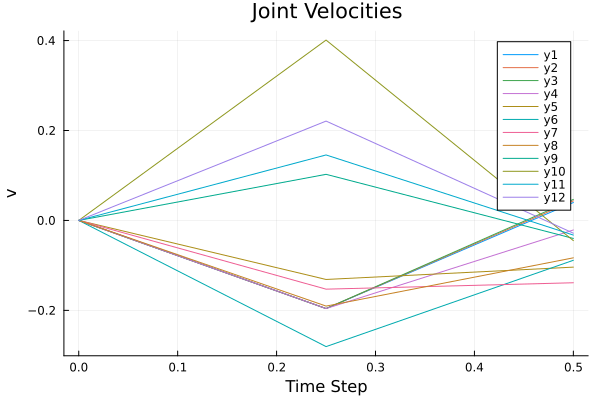

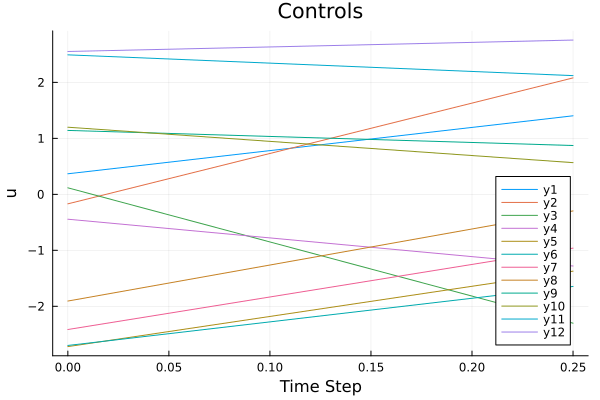

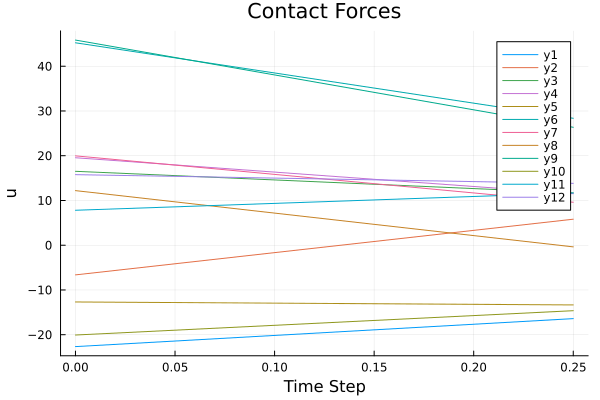

In [13]:
nq = params_dircol.nq
# ------------plotting--------------
Xm = hcat(X...)
Um = hcat(U...)
λm = hcat(λ...)

display(plot(t_vec, Xm[1:7,:]', xlabel="Time Step", ylabel="q", title="Floating Body Position"))
display(plot(t_vec, Xm[8:nq,:]', xlabel="Time Step", ylabel="q", title="Joint Angles"))
display(plot(t_vec, Xm[nq+1:nq+6,:]', xlabel="Time Step", ylabel="v", title="Floating Body Velocity"))
display(plot(t_vec, Xm[nq+7:end,:]', xlabel="Time Step", ylabel="v", title="Joint Velocities"))
display(plot(t_vec[1:end-1], Um', xlabel="Time Step", ylabel="u", title="Controls"))
display(plot(t_vec[1:end-1], λm', xlabel="Time Step", ylabel="u", title="Contact Forces"))